#  Machine Learning - Lab 2

Parand Mohri

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [27]:
# Class of k-Nearest Neigbor Classifier
class kNN():
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
        
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train
        self.maxColumn = [] # this list save the the maximum values in the X_train so we can use it for normalizing
        for (columnName, columnData) in X_train.iteritems():
            self.maxColumn.append(max(columnData.values))
        self.normalized_train = self.normalize(X_train) # here we are calculating the normalized train data 
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
            
            
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test
    
    
    def getDiscreteClassificationNormalized(self, X_test):
        # this method is doing the exact same thing as getDiscreteClassification method but instead of comparing X_test with 
        # X_train it take normalize X_test and compare it with normalized X_train
        Y_pred_test = []

   
        for i in range(len(X_test)):  
            test_instance = X_test.iloc[i] 
            
            distances = []  
          
            for j in range(len(self.normalized_train)):  
                train_instance = self.normalized_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, train_instance)
                distances.append(distance) 
                 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            y_pred_test = predictions.index[0]

            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test
 

    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
        return distance
    
    def normalize(self, x):
        # this method take a X_test and return the normalize one with the max values of X_train 
        normalized = x.copy()
        i = 0
        for (columnName, columnData) in normalized.iteritems():
            j = 0 
            for value in columnData:
                if(value > self.maxColumn[i]):
                    normalized.iloc[j, normalized.columns.get_loc(columnName)] = 1
                else:
                     normalized.iloc[j, normalized.columns.get_loc(columnName)] = value/ self.maxColumn[i]
                j = j + 1 
            i = i + 1    
        return normalized
    
    
    def getClassProbs(self, X_test_normalized):
        # this method is calculating the probability of each instance being in each class using Normalized X_train so the
        # X_test here is normalized X_test 
        columnsIndex = np.unique(self.Y_train) 
        prob = pd.DataFrame(index = columnsIndex)
        
        for i in range(len(X_test_normalized)):   
            test_instance = X_test_normalized.iloc[i] 
            
            distances = [] 
          
            for j in range(len(self.normalized_train)):
                train_instance = self.normalized_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, train_instance) 
                distances.append(distance) 
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            #until here we have the exact same code as getDiscreteClassification method but here we save the probabilities in predition 
            #instead of the final decition depending on the our k value.

            predictions = self.Y_train[df_knn.index].value_counts() / self.k
            prob['test' + str(i)] = predictions
        
        return prob
    
    def getPrediction(self, X_test_normalized):
        #this method computes for all the test instances in X_test regression values for the output attribute using normalized 
        # X_train so the X_test that we are getting is normalized 
        columnsIndex = np.unique(self.Y_train) 
        prob = pd.DataFrame(index = columnsIndex)
        avr = []
        for i in range(len(X_test_normalized)):  
            test_instance = X_test_normalized.iloc[i] 
            
            distances = [] 
          
            for j in range(len(self.normalized_train)): 
                train_instance = self.normalized_train.iloc[j] 
                distance = self.Minkowski_distance(test_instance, train_instance) 
                distances.append(distance) 
         
            df_dists = pd.DataFrame(data=distances, columns=['regression value'], index = self.Y_train.index)
        
            df_nn = df_dists.sort_values(by=['regression value'], axis=0)
            df_knn =  df_nn[:self.k]
            # till here the method is really similar to getDiscreteClassification method but here we are saving the avrage between 
            # k closest neighbors
            avr.append(np.mean(df_knn))
        df = pd.DataFrame(avr)
        return df
    

In [28]:
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('/Users/macbook/Downloads/glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter k for kNN
k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
normalTrainAcc = np.zeros(len(k_range))
normalTestAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    Y_pred_normalized_Train = clf.getDiscreteClassificationNormalized(clf.normalized_train)
    Y_pred_normalized_Test = clf.getDiscreteClassificationNormalized(clf.normalize(X_test))
    normalTrainAcc[index] = accuracy_score(Y_train, Y_pred_normalized_Train)
    normalTestAcc[index] = accuracy_score(Y_test, Y_pred_normalized_Test)
    index += 1

Text(0, 0.5, 'Accuracy')

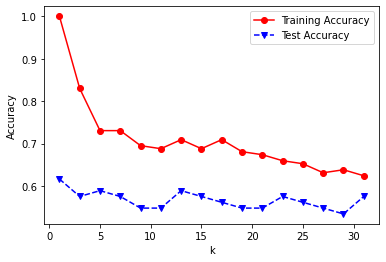

In [29]:
#########################################
# Plot of NOT normalized training and test accuracies 
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

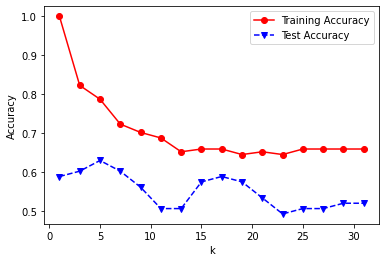

In [30]:
#########################################
# Plot of NORMALIZED training and test accuracies 
#########################################
plt.plot(k_range,normalTrainAcc,'ro-',k_range,normalTestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

as mentioned above the first plot is for train and test data without normalization and the second plot is woth normalize data. The accuracy is not that much different but the train accuracy in second plot is at least 0.7 but we can see in first one it goes blow 0.7. and normalize Test data is a but cleane and dont have as much ups and downs as first plot. 

In [405]:
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('/Users/macbook/Downloads/diabetes.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# for (columnName, columnData) in X_train.iteritems():
#     print(columnData)
# range for the values of parameter k for kNN

k_range = [1,3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]
# k_range = [1,3,5, 7]
trainAcc = np.zeros(len(k_range))
testAcc = np.zeros(len(k_range))
normalTrainAcc = np.zeros(len(k_range))
normalTestAcc = np.zeros(len(k_range))

index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    Y_pred_normalized_Train = clf.getDiscreteClassificationNormalized(clf.normalized_train)
    Y_pred_normalized_Test = clf.getDiscreteClassificationNormalized(clf.normalize(X_test))
    normalTrainAcc[index] = accuracy_score(Y_train, Y_pred_normalized_Train)
    normalTestAcc[index] = accuracy_score(Y_test, Y_pred_normalized_Test)
    index += 1


Text(0, 0.5, 'Accuracy')

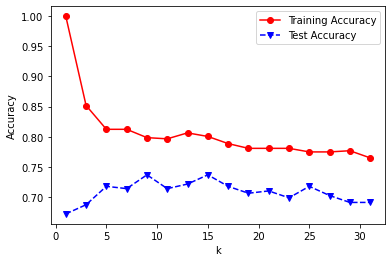

In [406]:
#########################################
# Plot of NOT normalized training and test accuracies 
#########################################
    
plt.plot(k_range,trainAcc,'ro-',k_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

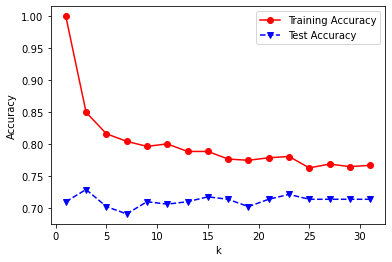

In [407]:
#########################################
# Plot of NORMALIZED training and test accuracies 
#########################################
plt.plot(k_range,normalTrainAcc,'ro-',k_range,normalTestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('k')
plt.ylabel('Accuracy')

Above we are doing the same thing as before but on the diabetes data 

In [31]:
##################################################
# Hold-out testing: Training and Test set creation
##################################################

# data = pd.read_csv('glass.csv')
data = pd.read_csv('/Users/macbook/Downloads/glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)


# range for the values of parameter exp for kNN

exp_range = [2,  100, 10000]

trainAcc = np.zeros(len(exp_range))
testAcc = np.zeros(len(exp_range))
normalTrainAcc = np.zeros(len(exp_range))
normalTestAcc = np.zeros(len(exp_range))

index = 0 
for exp  in  exp_range:
    clf = kNN(k = 3, exp = exp)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainAcc[index] = accuracy_score(Y_train, Y_predTrain)
    testAcc[index] = accuracy_score(Y_test, Y_predTest)
    Y_pred_normalized_Train = clf.getDiscreteClassificationNormalized(clf.normalized_train)
    Y_pred_normalized_Test = clf.getDiscreteClassificationNormalized(clf.normalize(X_test))
    normalTrainAcc[index] = accuracy_score(Y_train, Y_pred_normalized_Train)
    normalTestAcc[index] = accuracy_score(Y_test, Y_pred_normalized_Test)
    index += 1


<ipython-input-27-764979290d70>:100: RuntimeWarning: overflow encountered in double_scalars
  distance = distance + abs(x1[i] - x2[i])**self.exp


Text(0, 0.5, 'Accuracy')

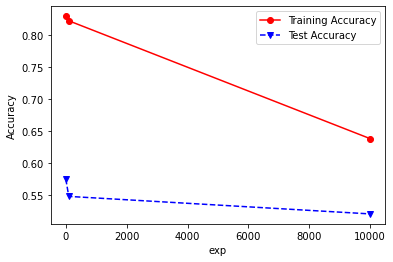

In [32]:
#########################################
# Plot of NOT normalized training and test accuracies
#########################################
    
plt.plot(exp_range,trainAcc,'ro-',exp_range,testAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Accuracy')

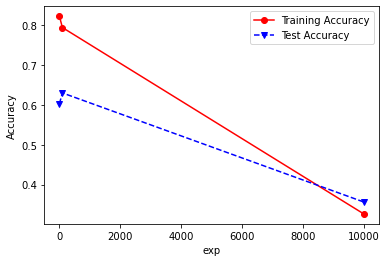

In [33]:
#########################################
# Plot of NORMALIZED training and test accuracies 
#########################################
plt.plot(exp_range,normalTrainAcc,'ro-',exp_range,normalTestAcc,'bv--')
plt.legend(['Training Accuracy','Test Accuracy'])
plt.xlabel('exp')
plt.ylabel('Accuracy')

Two graphs above are the diffferent output for different exp values for normalized and unormalized data as you can see we have better accuracy for our test data when we normalize it.

In [34]:
##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('/Users/macbook/Downloads/glass.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
clf = kNN()
clf.fit(X_train, Y_train)
X_test_normalized = clf.normalize(X_test)
Y_predTest = clf.getClassProbs(X_test_normalized)
print(Y_predTest)

                           test0     test1     test2  test3     test4  test5  \
'build wind float'      0.666667  0.333333       NaN    NaN  0.333333    NaN   
'build wind non-float'  0.333333  0.666667       NaN    1.0  0.666667    NaN   
'vehic wind float'           NaN       NaN       NaN    NaN       NaN    NaN   
containers                   NaN       NaN  0.666667    NaN       NaN    NaN   
headlamps                    NaN       NaN  0.333333    NaN       NaN    1.0   
tableware                    NaN       NaN       NaN    NaN       NaN    NaN   

                           test6     test7     test8     test9  ...  test63  \
'build wind float'           NaN       NaN  0.666667  0.333333  ...     NaN   
'build wind non-float'  0.666667       NaN  0.333333  0.666667  ...     1.0   
'vehic wind float'      0.333333       NaN       NaN       NaN  ...     NaN   
containers                   NaN  0.666667       NaN       NaN  ...     NaN   
headlamps                    NaN       NaN  

This data frame is the out put of getClassProbs for glass data with default k and exp with normalized data, as you can see for each test instance it returning the probability of that instance being in each class and for the classes that were not in the k nearest neighbors of each instance its returning Nan that means 0. 

In [35]:
data = pd.read_csv('/Users/macbook/Downloads/autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)
clf = kNN()
clf.fit(X_train, Y_train)
X_test_normalized = clf.normalize(X_test)
Y_predTest = clf.getPrediction(X_test_normalized)
print(Y_predTest)
error = mean_absolute_error(Y_test, Y_predTest)
print("this is the error " + str(error))

    regression value
0           0.038917
1           0.100631
2           0.151004
3           0.174677
4           0.120739
5           0.305917
6           0.121552
7           0.215947
8           0.334432
9           0.152970
10          0.138244
11          0.086449
12          0.144874
13          0.217343
14          0.145985
15          0.099126
16          0.133556
17          0.295672
18          0.087365
19          0.209629
20          0.394714
21          0.291216
22          0.328993
23          0.110613
24          0.114224
25          0.286618
26          0.298631
27          0.138843
28          0.030738
29          0.389835
30          0.056196
31          0.138613
32          0.208407
33          0.214136
34          0.150816
35          0.284302
36          0.029263
37          0.146428
38          0.138370
39          0.334406
40          0.187896
41          0.122466
42          0.439386
43          0.422994
44          0.145308
45          0.212251
46          0

Here I am using autoprice data for testing regrision method, the output you see is the regression values for this data having default k and exp and normalized. Also in the end of the data you can see the error.